# 25/11/21
Machine Learning Group Project


This file is our main file for the project.  All of our code will be contained
here.


Initial file creation by Dylan Kierans

# Version 0.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", size=14)

# Checking csv and titles by importing first row of a file

In [3]:
file_dir="../SpotifyData/"
file_name="ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv"

test_csv = pd.read_csv(file_dir+file_name, index_col=0, nrows=1) 
display(test_csv)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name
0,0.31,0.7,9,-5.678,1,0.047,0.011,0.00965,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4,Back In Black


# Choosing input columns
Now just importing the necessary training parameters

In [4]:
#Sticking with just the basic parameters for now
parameter_columns = [1,2,4,5,7,8,9]

#Saving these other ones for later
# key_column=3
# tempo_column=11
# duration_column=17


#Testing to make sure read column numbers correctly
data = pd.read_csv(file_dir+file_name, usecols=parameter_columns) 
display(data.head())

,danceability,energy,loudness,mode,acousticness,instrumentalness,liveness
0,0.310,0.700,-5.678,1,0.01100,0.009650,0.0828
1,0.671,0.373,-18.064,1,0.25700,0.000080,0.0481
2,0.579,0.508,-9.484,1,0.00574,0.000494,0.0575
3,0.508,0.834,-6.205,1,0.01830,0.000000,0.0732
4,0.596,0.605,-12.145,1,0.18100,0.000331,0.0863


# Playlist_number Column
Now to add an extra column which will hold the playlist_number

In [5]:
# Can never be too safe with printing len() values
print(len(data))

#Want to add column with name "playlist_number" and all entries equal to playlist number
playlist_number=1
playlist_numbers = playlist_number*np.ones(len(data))

data["playlist_number"]=playlist_numbers
display(data)
#Works a charm

300


,danceability,energy,loudness,mode,acousticness,instrumentalness,liveness,playlist_number
0,0.310,0.700,-5.678,1,0.01100,0.009650,0.0828,1.0
1,0.671,0.373,-18.064,1,0.25700,0.000080,0.0481,1.0
2,0.579,0.508,-9.484,1,0.00574,0.000494,0.0575,1.0
3,0.508,0.834,-6.205,1,0.01830,0.000000,0.0732,1.0
4,0.596,0.605,-12.145,1,0.18100,0.000331,0.0863,1.0
...,...,...,...,...,...,...,...,...
295,0.775,0.537,-10.698,1,0.52900,0.000220,0.0779,1.0
296,0.410,0.798,-8.181,1,0.22200,0.000006,0.2270,1.0
297,0.570,0.649,-7.116,1,0.18600,0.000000,0.1860,1.0
298,0.716,0.462,-9.312,0,0.00468,0.539000,0.1350,1.0


# Compiling Data
Next step is to make a single dataframe holding the data from all source files

In [6]:
file_names= ["ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
             "JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv"]


# Most convenient to set up dataframe with initial file, then systematically loop through the others
#Sticking with just the basic parameters for now
parameter_columns = [1,2,5,6,7,8,9]
nrows=200



#1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    # dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    
display(data)

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,playlist_number
0,0.310,0.700,1,0.0470,0.01100,0.009650,0.0828,1.0
1,0.671,0.373,1,0.0323,0.25700,0.000080,0.0481,1.0
2,0.579,0.508,1,0.0270,0.00574,0.000494,0.0575,1.0
3,0.508,0.834,1,0.0386,0.01830,0.000000,0.0732,1.0
4,0.596,0.605,1,0.0255,0.18100,0.000331,0.0863,1.0
...,...,...,...,...,...,...,...,...
1595,0.823,0.837,1,0.0582,0.19000,0.000000,0.2800,8.0
1596,0.834,0.917,1,0.0982,0.08950,0.000167,0.0532,8.0
1597,0.573,0.770,0,0.1840,0.23400,0.000000,0.1100,8.0
1598,0.694,0.771,1,0.0415,0.12700,0.000000,0.1320,8.0


# Training?
Any pre-processing necessary for:
- Repeat songs
- Incomplete data


Note: I have only chosen 200 songs from each playlist, some do contain more songs


In [22]:
X = data.loc[:,"danceability":"liveness"]
Y = data.loc[:,"playlist_number"]

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X,Y)
ypred = model.predict(X)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,Y))

[[139   0  34  27  24   9   9  23]
 [  0 196   0   0   0   0  16   0]
 [ 21   0 151  18  11   3   4  20]
 [  5   0   7 124   4  14   0  33]
 [ 22   0   4   4 160   0   0   1]
 [  2   0   0   5   0 164   0   7]
 [  6   4   3   0   0   1 171   0]
 [  5   0   1  22   1   9   0 116]]


[0.5974471584869431, 0.6009065384874732, 0.6074162464736479, 0.6051115527837009]
[0.016770369041951724, 0.016424791565588088, 0.02084493230720012, 0.02461290879933121]


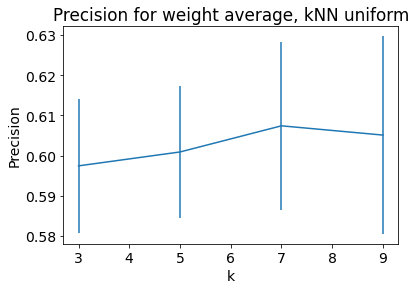

In [61]:
X = data.loc[:,"danceability":"liveness"].values
Y = data.loc[:,"playlist_number"]

n_splits = 5
ks=[3,5,7,9]

from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold    
from sklearn.metrics import precision_score
kf = KFold(n_splits= n_splits, shuffle=True) #Important to shuggle our ordered data


tmp=[]
precision=[]
precision_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )

print(precision)
print(precision_err)

plt.errorbar(ks, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision for weight average, kNN uniform")
plt.show()

[0.5757105255690735, 0.5849045272049365, 0.5911728385718268, 0.5946477453733938]
[0.012055116304846908, 0.014674148685206013, 0.024812179440904688, 0.026828923487923876]


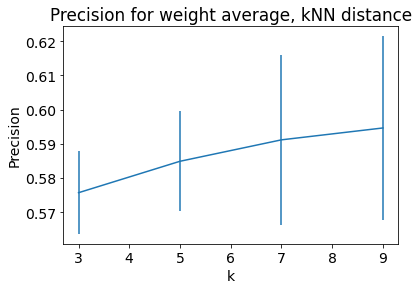

In [64]:
tmp=[]
precision=[]
precision_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )

print(precision)
print(precision_err)

plt.errorbar(ks, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision for weight average, kNN distance")
plt.show()

[0.5873031320836539, 0.5892189049612764, 0.5910045606462588, 0.5947342234743126]
[0.013175173583432584, 0.014840049226382209, 0.021487375009343147, 0.021907701718113473]


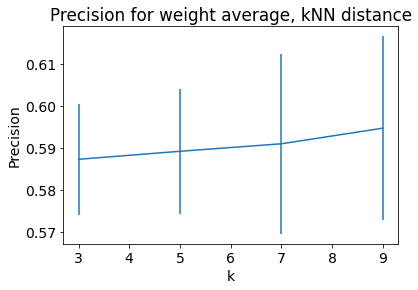

In [69]:
prec_tmp=[]
precision=[]
precision_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        prec_tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(prec_tmp).mean() )
    precision_err.append( np.array(prec_tmp).std() )

print(precision)
print(precision_err)

plt.errorbar(ks, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision for weight average, kNN distance")
plt.show()


In [74]:
prec_tmp=[]
precision=[]
precision_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        prec_tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(prec_tmp).mean() )
    precision_err.append( np.array(prec_tmp).std() )
    
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(Y[test],model.decision_function(X[test]))
    plt.plot(fpr,tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot([0, 1], [0, 1], color="green",linestyle="--")
    plt.show()


print(precision)
print(precision_err)

plt.errorbar(ks, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision for weight average, kNN distance")
plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'